# Analysis of the beamtime data

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filepath_drive = "/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05"

In [ ]:
cd /content/drive/MyDrive/data-engineering-utokyo/notebooks

In [ ]:
import sys
sys.path.insert(0,'..')

from datetime import datetime
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from src.constants.mot_constants import c_ccd, c_cmos_Fr_20220918, c_cmos_Rb_20220918
from src.recorders.ssd_recorder import SSDRecorder
from src.recorders.file_recorder import FileRecorder
from src.recorders.image_file_recorder import ImageFileRecorder
from src.analyses.analysis import ResultParameter
from src.analyses.ssd_analysis import SSDAnalysis
from src.analyses.image_analysis import ImageAnalysis
from src.analyses.mkdir import create_folders
from src.analyses.runner import Runner
from src.analyses.fit_mot_number import MOTMLE

# Overview
First we have to find the times when we performed which experiment. We checkout the preparation day (Saturday, 17. September 2022), and the two experiment days Sunday and Monday.  

In [ ]:
# Saturday
image_folder = f"{filepath_drive}/mot_data/"
match = ".*20220917.*cmos_roidata.*cmos.*.csv$" 
image_recorder_saturday = ImageFileRecorder(
    filepath=image_folder,
    match=match 
    )
image_df_saturday = image_recorder_saturday.get_table()
image_df_saturday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


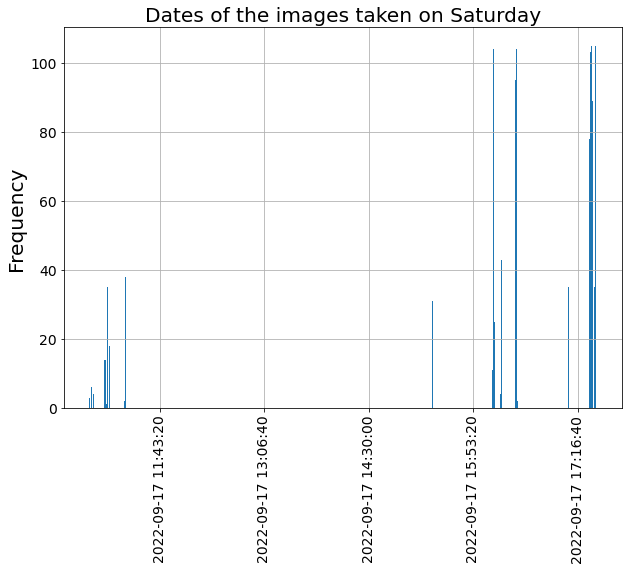

In [ ]:
# Saturday
fig, ax = plt.subplots()
image_df_saturday["datetime"].astype(np.int64).plot.hist(ax=ax, bins=500, grid=True)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
plt.title("Dates of the images taken on Saturday")
plt.show()

In [ ]:
# Sunday
image_folder = f"{filepath_drive}/mot_data/"
match = ".*20220918.*cmos_roidata.*cmos.*.csv$" 
image_recorder_sunday = ImageFileRecorder(
    filepath=image_folder,
    match=match 
    )
image_df_sunday = image_recorder_sunday.get_table()
image_df_sunday

['/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000257.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000259.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000260.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000262.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000264.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000265.csv', '/content/drive/.shortcut-t

,filename,filepath,filename_with_extension,Time,ROI Sum,Coil (1:ON 0:OFF),timestamp,datetime
23,cmos_000066,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_000066.csv,2022/09/18 13:32:07.642,4988707,1,1663507927642000000,2022-09-18 13:32:07.642
24,cmos_000068,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_000068.csv,2022/09/18 13:32:08.211,4995350,1,1663507928211000000,2022-09-18 13:32:08.211
25,cmos_000069,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_000069.csv,2022/09/18 13:32:08.493,5001682,1,1663507928493000000,2022-09-18 13:32:08.493
26,cmos_000071,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_000071.csv,2022/09/18 13:32:09.074,5002216,1,1663507929074000000,2022-09-18 13:32:09.074
27,cmos_000072,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_000072.csv,2022/09/18 13:32:09.355,5009241,1,1663507929355000000,2022-09-18 13:32:09.355
...,...,...,...,...,...,...,...,...
1057,cmos_082652,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_082652.csv,2022/09/18 20:25:09.967,6471498,1,1663532709967000000,2022-09-18 20:25:09.967
1058,cmos_082654,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_082654.csv,2022/09/18 20:25:10.421,6465405,1,1663532710421000000,2022-09-18 20:25:10.421
1059,cmos_082655,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_082655.csv,2022/09/18 20:25:10.873,6464743,1,1663532710873000000,2022-09-18 20:25:10.873
1060,cmos_082657,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_082657.csv,2022/09/18 20:25:11.319,6456791,1,1663532711319000000,2022-09-18 20:25:11.319


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


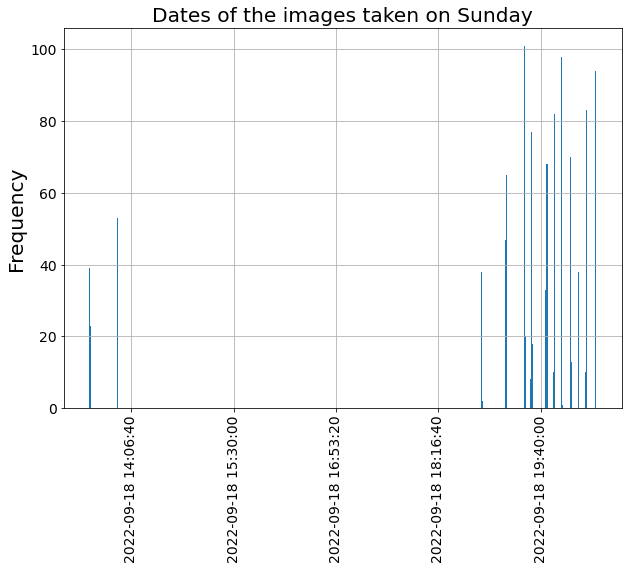

In [ ]:
# Sunday
fig, ax = plt.subplots()
image_df_sunday["datetime"].astype(np.int64).plot.hist(ax=ax, bins=500, grid=True)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
plt.title("Dates of the images taken on Sunday")
plt.show()

In [ ]:
# Monday
image_folder = f"{filepath_drive}/mot_data/"
match = ".*20220919.*cmos_roidata.*cmos.*.csv$" 
image_recorder_monday = ImageFileRecorder(
    filepath=image_folder,
    match=match 
    )
image_df_monday = image_recorder_monday.get_table()
image_df_monday

['/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000032.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000034.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000035.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000037.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000038.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000040.csv', '/content/drive/.shortcut-t

,filename,filepath,filename_with_extension,Time,ROI Sum,Coil (1:ON 0:OFF),timestamp,datetime
2945,cmos_020033,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_020033.csv,2022/09/19 14:20:26.292,3882789,1,1663597226292000000,2022-09-19 14:20:26.292
2946,cmos_020034,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_020034.csv,2022/09/19 14:20:26.747,3878388,1,1663597226747000000,2022-09-19 14:20:26.747
2947,cmos_020036,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_020036.csv,2022/09/19 14:20:27.220,3883750,1,1663597227220000000,2022-09-19 14:20:27.220
2948,cmos_020037,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_020037.csv,2022/09/19 14:20:27.693,3887594,1,1663597227693000000,2022-09-19 14:20:27.693
2949,cmos_020039,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_020039.csv,2022/09/19 14:20:28.162,3907757,1,1663597228162000000,2022-09-19 14:20:28.162
...,...,...,...,...,...,...,...,...
995,cmos_068857,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_068857.csv,2022/09/19 20:59:15.493,6003328,1,1663621155493000000,2022-09-19 20:59:15.493
996,cmos_068859,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_068859.csv,2022/09/19 20:59:15.966,6005284,1,1663621155966000000,2022-09-19 20:59:15.966
997,cmos_068860,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_068860.csv,2022/09/19 20:59:16.438,6009120,1,1663621156438000000,2022-09-19 20:59:16.438
998,cmos_068862,/content/drive/.shortcut-targets-by-id/1B48ps8...,cmos_068862.csv,2022/09/19 20:59:16.909,6015678,1,1663621156909000000,2022-09-19 20:59:16.909


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


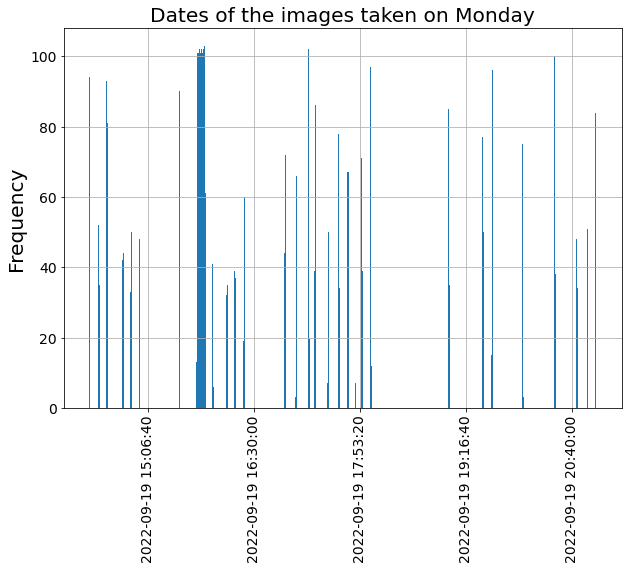

In [ ]:
# Monday
fig, ax = plt.subplots()
image_df_monday["datetime"].astype(np.int64).plot.hist(ax=ax, bins=500, grid=True)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
plt.title("Dates of the images taken on Monday")
plt.show()

Maybe later we can also group by time like explained here: https://stackoverflow.com/questions/11073609/how-to-group-dataframe-by-a-period-of-time

## Preparation with Rubidium (Sunday, 9:00 - 13:00)
During this time, no images were taken. Here we can run the SSD analysis in another notebook.

## First measurements with Francium (Sunday, 13:00 - 21:00)
During this time, we took both camera images and the signal from the current integrator. We first perform just the analysis of the camera images. 



In [ ]:
# Input 
image_folder = f"{filepath_drive}/mot_data/"
match = ".*20220918.*cmos_roidata.*cmos.*.csv$" 
c = c_cmos_Fr_20220918

# Set region of interest (ROI)
c.Xmin=175 + 25
c.Xmax=232 + 125
c.Ymin=233 - 25
c.Ymax=290 + 75
c.Xnum = c.Xmax - c.Xmin
c.Ynum = c.Ymax - c.Ymin

min_signal = 0
time_interval = (
    datetime(2022, 9, 18, 13, 0, 0), 
    datetime(2022, 9, 18, 21, 0, 0)
    )
use_n_reference_images = 20
dead_pixel_percentile = 2.0 # [%], must between 0 and 100

# Output 
run_name = f"Sunday_Fr_1300_to_2100_min_signal{min_signal}_nref{use_n_reference_images}_deadp{str(int(dead_pixel_percentile))}"
plot_path = f"{filepath_drive}/plots/{run_name}/" 
result_path = f"{filepath_drive}/results/{run_name}/" 

In [ ]:
# Make dirs
create_folders(plot_path, result_path)

# Setup result parameters
result_param_image = ResultParameter(
    image_src=plot_path+"image/",
    image_extension=".png",
    result_filepath=result_path+"image_analysis_results.csv"
    )

# Setup recorders
image_recorder = ImageFileRecorder(
    filepath=image_folder,
    match=match 
    )

# Setup analyses
reference_image_filepaths = image_recorder.get_table().head(use_n_reference_images)["filepath"]

['/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000257.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000259.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000260.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000262.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000264.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220918-122539_data/cmos_roidata/0918122554/cmos_000265.csv', '/content/drive/.shortcut-t

In [ ]:
perform_analysis = MOTMLE(c=c, 
                          references=reference_image_filepaths,
                          do_subtract_dead_pixels=True,
                          dead_pixel_percentile=dead_pixel_percentile).perform_analysis
image_analysis = ImageAnalysis(
    recorder=image_recorder,
    perform_analysis=perform_analysis, 
    result_param=result_param_image,
    min_signal=min_signal,
    time_interval=time_interval
    )
    
# Setup runner
runner = Runner(analyses=[image_analysis])
runner.run(cycles=1, period_s=5)

Output hidden; open in https://colab.research.google.com to view.

## Second measurement with Francium (Monday, 9:00 - 18:00)

In [ ]:
# Input 
image_folder = f"{filepath_drive}/mot_data/"
match = ".*20220919.*cmos_roidata.*cmos.*.csv$" 
c = c_cmos_Fr_20220918

# Set region of interest (ROI)
c.Xmin=175 + 25 - 50
c.Xmax=232 + 125 + 50
c.Ymin=233 - 25 - 50
c.Ymax=290 + 75 + 50
c.Xnum = c.Xmax - c.Xmin
c.Ynum = c.Ymax - c.Ymin

min_signal = 0
time_interval = (
    datetime(2022, 9, 19, 9, 0, 0), 
    datetime(2022, 9, 19, 18, 0, 0)
    )
use_n_reference_images = 20
dead_pixel_percentile = 2.0 # [%], must between 0 and 100

# Output 
run_name = f"Monday_Fr_0900_1800_min_signal{min_signal}_nref{use_n_reference_images}_deadp{str(int(dead_pixel_percentile))}"
plot_path = f"{filepath_drive}/plots/{run_name}/" 
result_path = f"{filepath_drive}/results/{run_name}/" 

In [ ]:
# Make dirs
create_folders(plot_path, result_path)

# Setup result parameters
result_param_image = ResultParameter(
    image_src=plot_path+"image/",
    image_extension=".png",
    result_filepath=result_path+"image_analysis_results.csv"
    )

# Setup recorders
image_recorder = ImageFileRecorder(
    filepath=image_folder,
    match=match 
    )

# Setup analyses
reference_image_filepaths = image_recorder.get_table().head(use_n_reference_images)["filepath"]

['/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000032.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000034.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000035.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000037.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000038.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000040.csv', '/content/drive/.shortcut-t

In [ ]:
perform_analysis = MOTMLE(c=c, 
                          references=reference_image_filepaths,
                          do_subtract_dead_pixels=True,
                          dead_pixel_percentile=dead_pixel_percentile).perform_analysis
image_analysis = ImageAnalysis(
    recorder=image_recorder,
    perform_analysis=perform_analysis, 
    result_param=result_param_image,
    min_signal=min_signal,
    time_interval=time_interval
    )
    
# Setup runner
runner = Runner(analyses=[image_analysis])
runner.run(cycles=1, period_s=5)

Output hidden; open in https://colab.research.google.com to view.

## Third measurement with Francium (Monday, 18:00 - 21:00)


In [ ]:
# Input 
image_folder = f"{filepath_drive}/mot_data/"
match = ".*20220919.*cmos_roidata.*cmos.*.csv$" 
c = c_cmos_Fr_20220918

# Set region of interest (ROI)
c.Xmin=175 + 25
c.Xmax=232 + 125
c.Ymin=233 - 25
c.Ymax=290 + 75
c.Xnum = c.Xmax - c.Xmin
c.Ynum = c.Ymax - c.Ymin

min_signal = 0
time_interval = (
    datetime(2022, 9, 19, 18, 0, 0), 
    datetime(2022, 9, 19, 21, 0, 0)
    )
use_n_reference_images = 20
dead_pixel_percentile = 2.0 # [%], must between 0 and 100

# Output 
run_name = f"Monday_Fr_1800_2100_min_signal{min_signal}_nref{use_n_reference_images}_deadp{str(int(dead_pixel_percentile))}"
plot_path = f"{filepath_drive}/plots/{run_name}/" 
result_path = f"{filepath_drive}/results/{run_name}/" 

In [ ]:
# Make dirs
create_folders(plot_path, result_path)

# Setup result parameters
result_param_image = ResultParameter(
    image_src=plot_path+"image/",
    image_extension=".png",
    result_filepath=result_path+"image_analysis_results.csv"
    )

# Setup recorders
image_recorder = ImageFileRecorder(
    filepath=image_folder,
    match=match 
    )

# Setup analyses
reference_image_filepaths = image_recorder.get_table().head(use_n_reference_images)["filepath"]

['/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000032.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000034.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000035.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000037.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000038.csv', '/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05/mot_data/20220919-123028_data/cmos_roidata/0919123538/cmos_000040.csv', '/content/drive/.shortcut-t

In [ ]:
perform_analysis = MOTMLE(c=c, 
                          references=reference_image_filepaths,
                          do_subtract_dead_pixels=True,
                          dead_pixel_percentile=dead_pixel_percentile).perform_analysis
image_analysis = ImageAnalysis(
    recorder=image_recorder,
    perform_analysis=perform_analysis, 
    result_param=result_param_image,
    min_signal=min_signal,
    time_interval=time_interval
    )
    
# Setup runner
runner = Runner(analyses=[image_analysis])
runner.run(cycles=1, period_s=5)

Output hidden; open in https://colab.research.google.com to view.